<a href="https://colab.research.google.com/github/manuadu/FMML_Projects_and_Labs/blob/main/Copy_of_STP_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1, Lab 1: Introduction to Machine Learning and Feature Extraction

## What is Machine Learning?

Machine learning is a branch of artificial intelligence that enables computers to learn patterns from data without being explicitly programmed. Instead of writing specific rules, we train algorithms on examples to make predictions or decisions.

### Types of Machine Learning

**1. Supervised Learning**
- The algorithm learns from labeled data (input-output pairs)
- Goal: Learn a mapping function from inputs to outputs
- Two main types:
  - **Classification**: Predicting categories (e.g., spam/not spam, digit 0-9)
  - **Regression**: Predicting continuous values (e.g., house prices, temperature)

**2. Unsupervised Learning**
- The algorithm finds patterns in unlabeled data
- Goal: Discover hidden structure or relationships
- Examples: Clustering, dimensionality reduction

---

**Links**

Video - https://youtu.be/hsJidtpHHyo?si=O8Hp2aqvNUELkvmt

Text - https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
## Quick ML Examples with Scikit-Learn

### Example 1: Classification with Iris Dataset

# Extracting features from data

Module 1, Lab 1<br>



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset (flower classification)
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy: {accuracy:.2%}")
print(f"Predicted classes: {predictions[:5]}")
print(f"Actual classes: {y_test[:5]}")

Classification Accuracy: 100.00%
Predicted classes: [1 0 2 1 1]
Actual classes: [1 0 2 1 1]


### Example 2: Regression with Boston Housing Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data[:500], housing.target[:500]  # Use subset for speed

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
predictions = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"\nFirst 5 predictions: {predictions[:5]}")
print(f"First 5 actual values: {y_test[:5]}")

Mean Squared Error: 0.21
R² Score: 0.81

First 5 predictions: [2.52559351 0.97113716 1.45014085 3.19893231 1.90248745]
First 5 actual values: [2.5   0.675 1.22  4.103 3.357]


## Understanding Features in Machine Learning

### What are Features?

**Features** are measurable properties or characteristics of your data that you use as input for machine learning algorithms. Think of them as columns in a spreadsheet.

**Example**: If you're predicting house prices:
- Features might include: square footage, number of bedrooms, location, age of house
- Target/Label: the price (what you want to predict)


In [ ]:
# Example feature representation
house_data = {
    'square_feet': [1500, 2000, 1200, 1800],
    'bedrooms': [3, 4, 2, 3],
    'age_years': [10, 5, 15, 8],
    'price': [300000, 450000, 250000, 380000]  # This is the target
}

### Why CSV Format?

CSV (Comma-Separated Values) is one of the most common formats for ML datasets because:

1. **Structured**: Data is organized in rows and columns (tabular format)
2. **Easy to read**: Both humans and machines can parse it easily
3. **Universal**: Works with all ML libraries (scikit-learn, pandas, TensorFlow, etc.)

**CSV Structure:**
```
feature1,feature2,feature3,target
1.2,3.4,5.6,0
2.3,4.5,6.7,1
3.4,5.6,7.8,0
```

Each row = one sample/observation
Each column = one feature
Last column = target/label (what we want to predict)

### Converting Raw Data to Features

In [ ]:
import pandas as pd
import numpy as np

# Example: Text data → Features
texts = ["I love this!", "Terrible product", "Amazing quality"]

# Feature extraction (simple bag-of-words approach)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text_features = vectorizer.fit_transform(texts)

print("Text features as array:")
print(text_features.toarray())
print("\nFeature names (vocabulary):")
print(vectorizer.get_feature_names_out())

# Convert to CSV-like format (DataFrame)
df = pd.DataFrame(text_features.toarray(),
                  columns=vectorizer.get_feature_names_out())
print("\nAs DataFrame (CSV-like structure):")
print(df)

Text features as array:
[[0 1 0 0 0 1]
 [0 0 1 0 1 0]
 [1 0 0 1 0 0]]

Feature names (vocabulary):
['amazing' 'love' 'product' 'quality' 'terrible' 'this']

As DataFrame (CSV-like structure):
   amazing  love  product  quality  terrible  this
0        0     1        0        0         0     1
1        0     0        1        0         1     0
2        1     0        0        1         0     0


### Real Example: Iris Dataset as CSV

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

# Create DataFrame (like a CSV)
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

print("Iris dataset in CSV-like format:")
print(df_iris.head())

# Save as actual CSV
df_iris.to_csv('iris_dataset.csv', index=False)
print("\n✓ Saved as iris_dataset.csv")

Iris dataset in CSV-like format:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

✓ Saved as iris_dataset.csv


In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=a48f02943561c8a9088349531766657dfca0e989037844217a7bd2dbbac7e1b2
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
import wikipedia

# Fix for Wikipedia PageError
topic1 = 'Giraffe'
topic2 = 'Elephant'

def get_wikipedia_content(topic, lang='en'):
    """Safely fetch Wikipedia content with error handling"""
    wikipedia.set_lang(lang)
    try:
        # Disable auto-suggest to prevent title mismatches
        page = wikipedia.page(topic, auto_suggest=False)
        return page.content
    except wikipedia.exceptions.DisambiguationError as e:
        # If multiple pages exist, use the first option
        print(f"Disambiguation for '{topic}': using '{e.options[0]}'")
        return wikipedia.page(e.options[0]).content
    except wikipedia.exceptions.PageError:
        # If page not found, try with auto-suggest enabled
        print(f"Page not found for '{topic}', trying auto-suggest...")
        return wikipedia.page(topic).content

# Fetch content
eng1 = get_wikipedia_content(topic1, 'en')
eng2 = get_wikipedia_content(topic2, 'en')
fr1 = get_wikipedia_content(topic1, 'fr')
fr2 = get_wikipedia_content(topic2, 'fr')

print("✓ Successfully fetched all Wikipedia pages")
print(f"English {topic1} length: {len(eng1)} characters")
print(f"English {topic2} length: {len(eng2)} characters")
print(f"French {topic1} length: {len(fr1)} characters")
print(f"French {topic2} length: {len(fr2)} characters")

/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Disambiguation for 'Elephant': using 'éléphant'
✓ Successfully fetched all Wikipedia pages
English Giraffe length: 40373 characters
English Elephant length: 56124 characters
French Giraffe length: 28657 characters
French Elephant length: 40538 characters


This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. \nIls correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparaît dans de nombreuses cultures. Il est symbole de sagesse en Asie et est  connu pour sa mémoire et 

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapitraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspecieswithsevensubspecieswhichcanbedistinguishedmorphologicallybytheirfurcoatpatternssixvalidextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheirof

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(counter_obj, n=None): # Added n parameter
  if n is None:
      keys = key2string(counter_obj.keys())
      values = list(counter_obj.values())
  else:
      # Get the top n most common items
      items = counter_obj.most_common(n)
      keys, values = zip(*items)
      keys = key2string(keys)

  # sort the keys in alphabetic order (if not using top n) or by value (if using top n)
  if n is None:
    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
  else:
    # If using top n, keys and values are already sorted by value from most_common
    pass # Keep the order from most_common for better visualization of top items

  plt.bar(keys, values)
  if n is not None: # Add rotation for better readability of bigrams when showing top N
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout() # Adjust layout to prevent labels overlapping

Let us compare the histograms of English pages and French pages. Can you spot a difference?

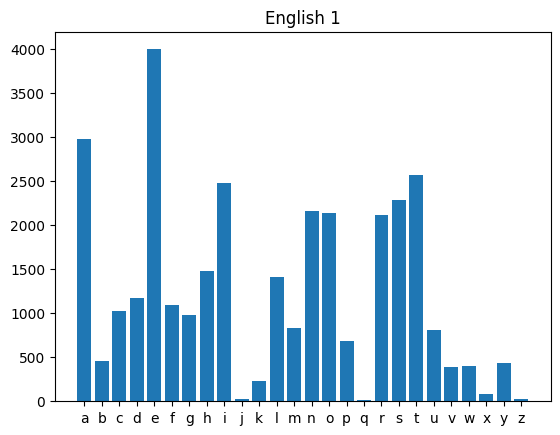

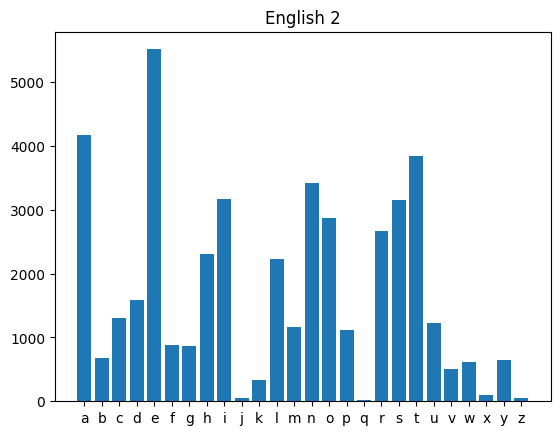

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

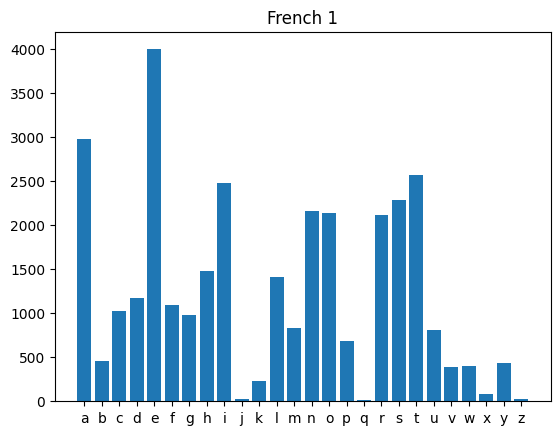

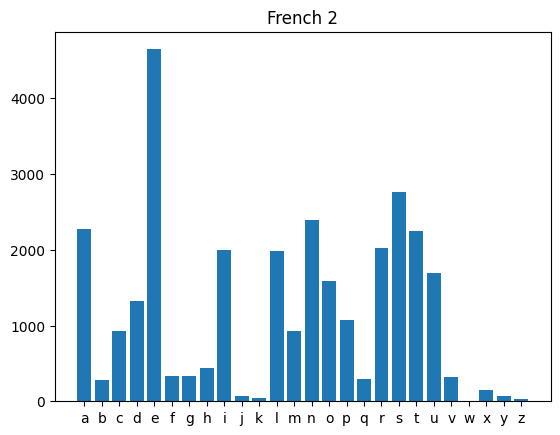

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

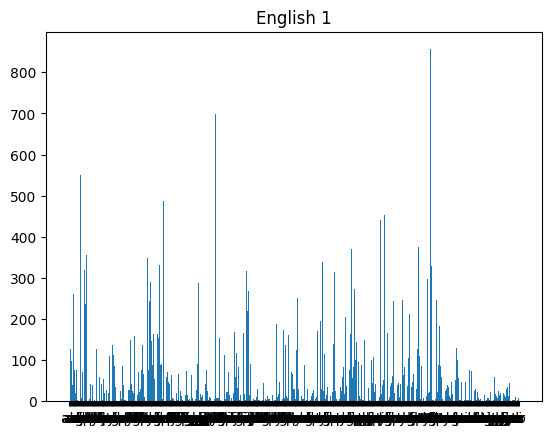

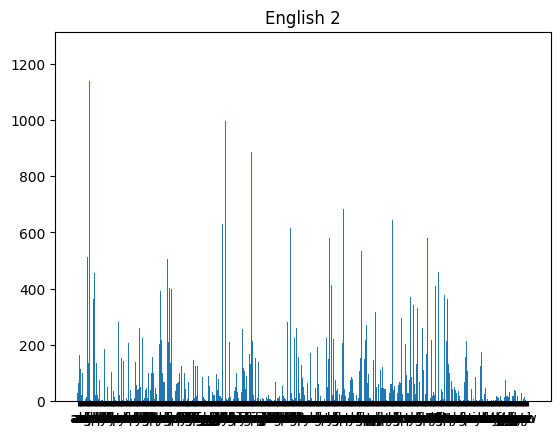

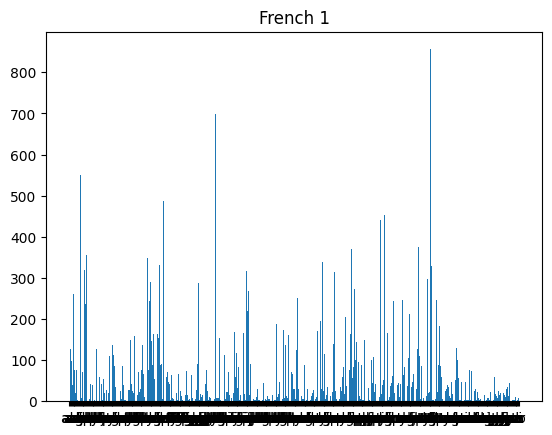

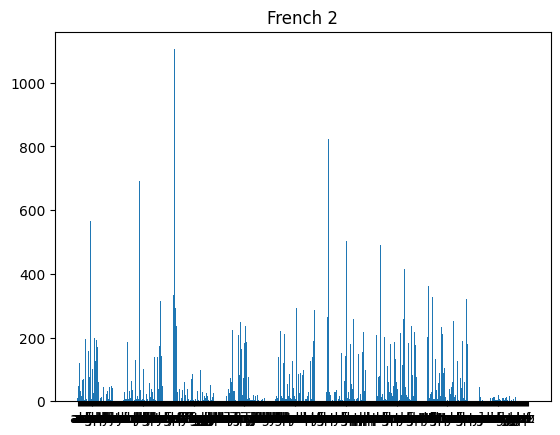

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

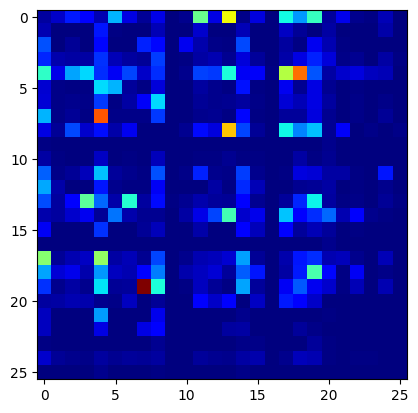

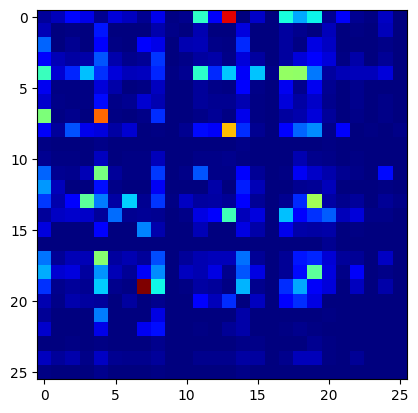

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

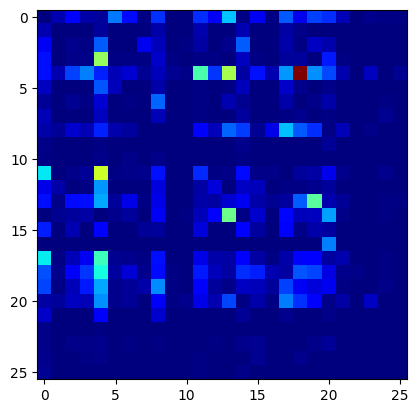

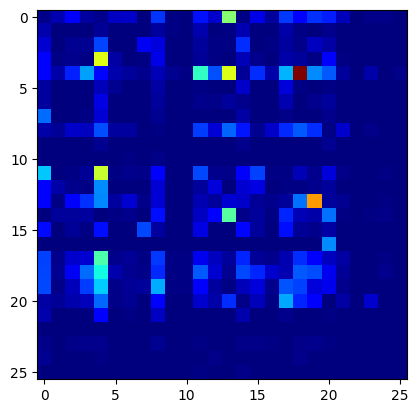

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 856.0
('h', 'e') : 699.0
('e', 's') : 677.0
('i', 'n') : 601.0
('a', 'n') : 550.0
('e', 'r') : 486.0
('r', 'e') : 452.0
('r', 'a') : 440.0
('a', 'l') : 408.0
('n', 'd') : 397.0

English 2:
('t', 'h') : 1251.0
('a', 'n') : 1139.0
('h', 'e') : 997.0
('i', 'n') : 885.0
('n', 't') : 683.0
('e', 'r') : 662.0
('e', 's') : 656.0
('r', 'e') : 644.0
('h', 'a') : 629.0
('l', 'e') : 616.0

French 1:
('e', 's') : 788.0
('l', 'e') : 473.0
('e', 'n') : 435.0
('d', 'e') : 420.0
('o', 'n') : 379.0
('n', 't') : 362.0
('e', 'l') : 345.0
('r', 'e') : 335.0
('s', 'e') : 296.0
('r', 'a') : 282.0

French 2:
('e', 's') : 1105.0
('n', 't') : 823.0
('d', 'e') : 690.0
('e', 'n') : 686.0
('l', 'e') : 652.0
('a', 'n') : 566.0
('o', 'n') : 504.0
('r', 'e') : 492.0
('e', 'l') : 456.0
('s', 'e') : 414.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

1.Try with different languages

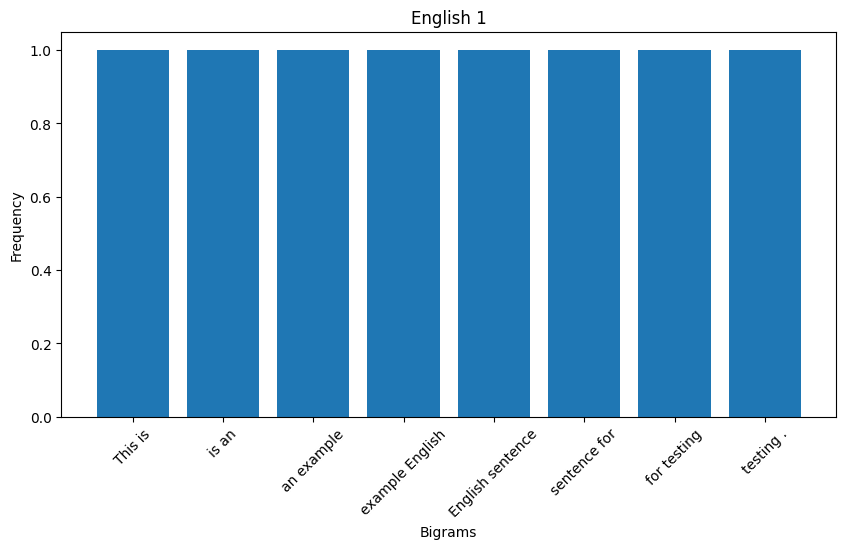

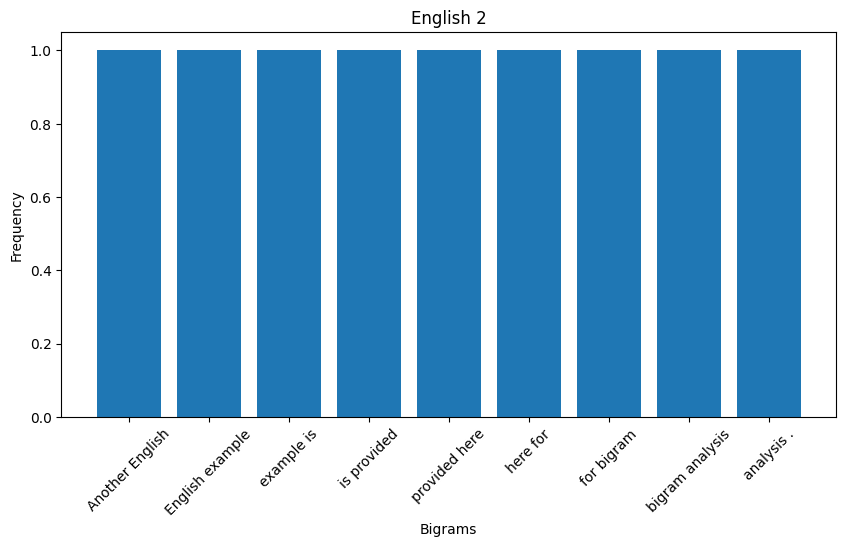

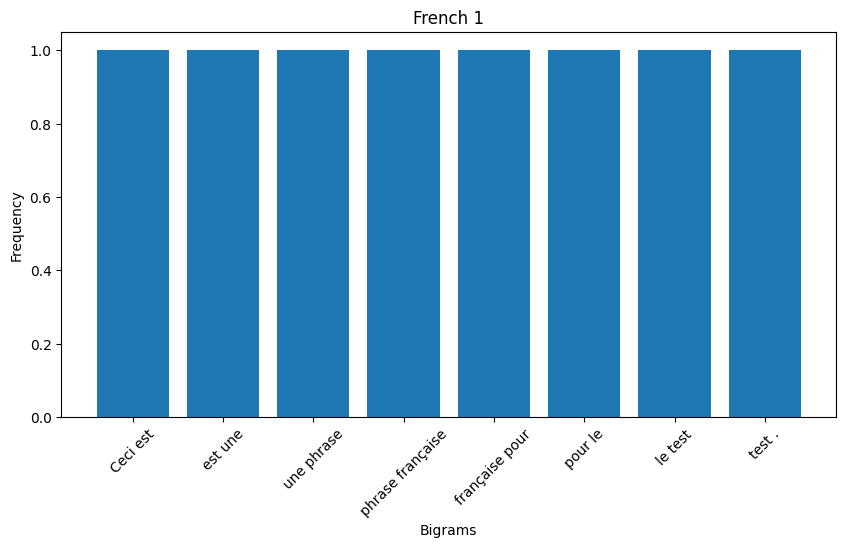

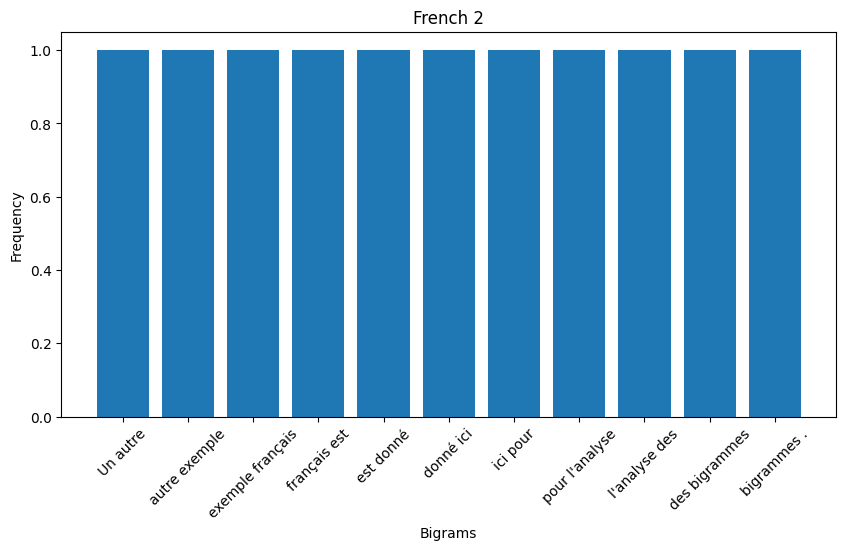

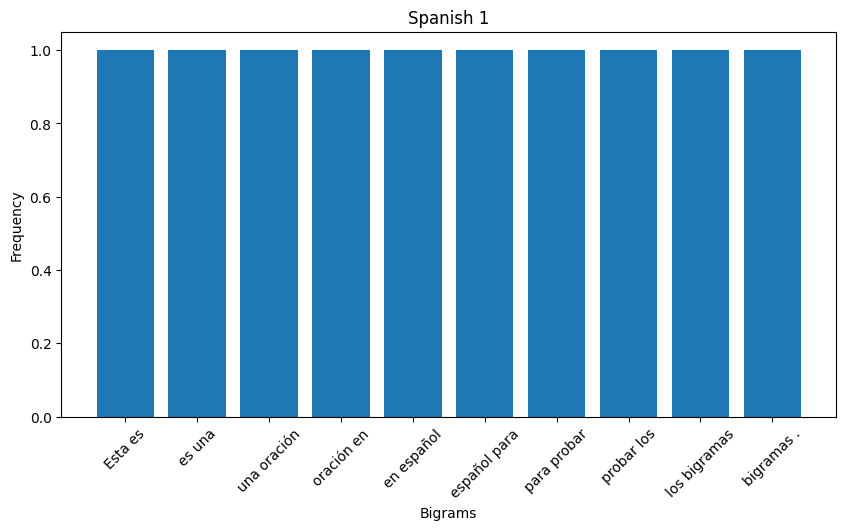

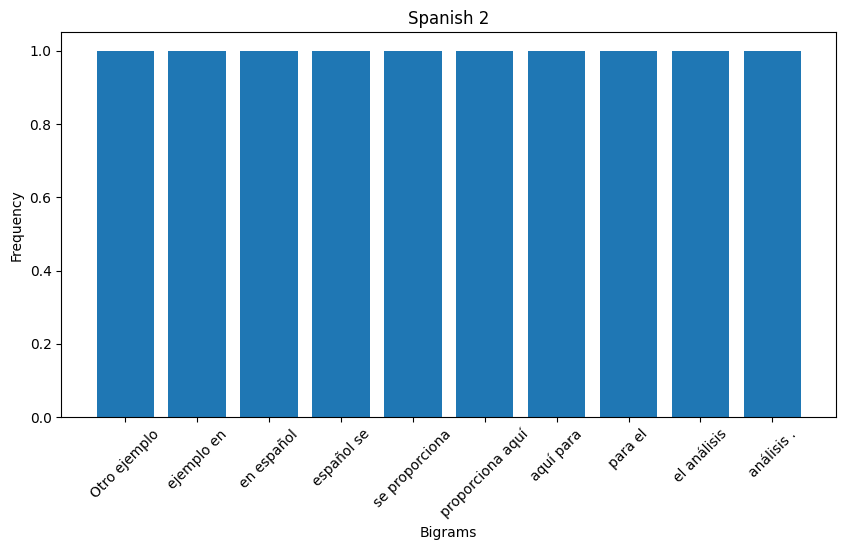

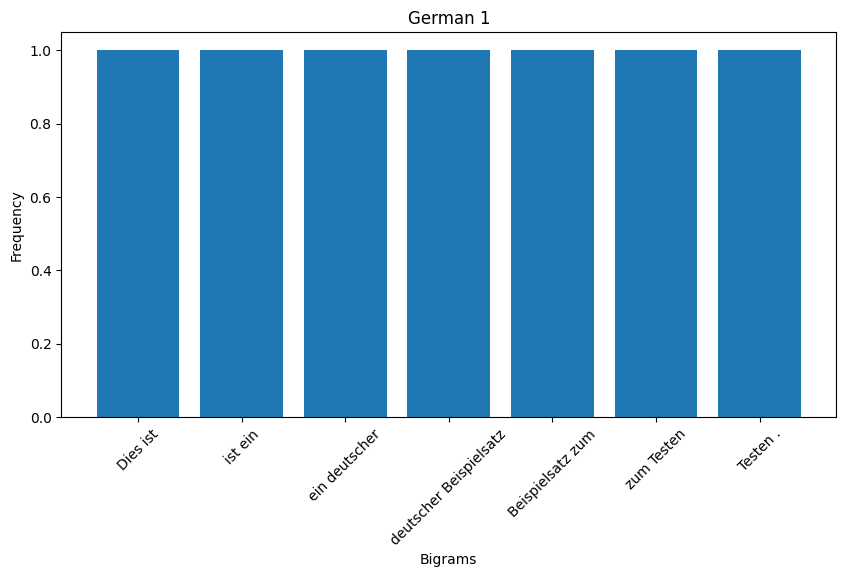

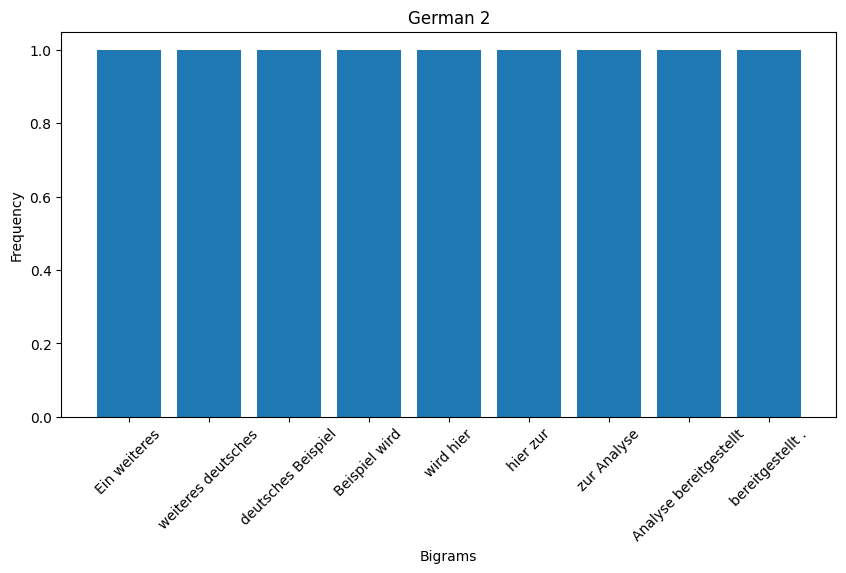

In [ ]:
from collections import Counter
from nltk import ngrams, word_tokenize
import matplotlib.pyplot as plt

# Example texts — replace these with your actual text data
eng1 = word_tokenize("This is an example English sentence for testing.")
eng2 = word_tokenize("Another English example is provided here for bigram analysis.")
fr1 = word_tokenize("Ceci est une phrase française pour le test.")
fr2 = word_tokenize("Un autre exemple français est donné ici pour l'analyse des bigrammes.")
sp1 = word_tokenize("Esta es una oración en español para probar los bigramas.")
sp2 = word_tokenize("Otro ejemplo en español se proporciona aquí para el análisis.")
ger1 = word_tokenize("Dies ist ein deutscher Beispielsatz zum Testen.")
ger2 = word_tokenize("Ein weiteres deutsches Beispiel wird hier zur Analyse bereitgestellt.")

# Function to plot histogram from Counter
def plothistogram(counter_obj, n=20):
    items = counter_obj.most_common(n)
    keys = [' '.join(k) for k, _ in items]
    values = [v for _, v in items]
    plt.figure(figsize=(10, 5))
    plt.bar(keys, values)
    plt.xticks(rotation=45)
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')

# Function to generate bigrams and plot
def plot_bigrams(text, title):
    bigram = Counter(ngrams(text, 2))
    plothistogram(bigram, n=20)
    plt.title(title)
    plt.show()

# ---- English ----
plot_bigrams(eng1, "English 1")
plot_bigrams(eng2, "English 2")

# ---- French ----
plot_bigrams(fr1, "French 1")
plot_bigrams(fr2, "French 2")

# ---- Spanish ----
plot_bigrams(sp1, "Spanish 1")
plot_bigrams(sp2, "Spanish 2")

# ---- German ----
plot_bigrams(ger1, "German 1")
plot_bigrams(ger2, "German 2")


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

What happens if we use very different topics

✓ Fetched text for 'Quantum Mechanics' (77419 characters)
✓ Fetched text for 'Pizza' (19688 characters)



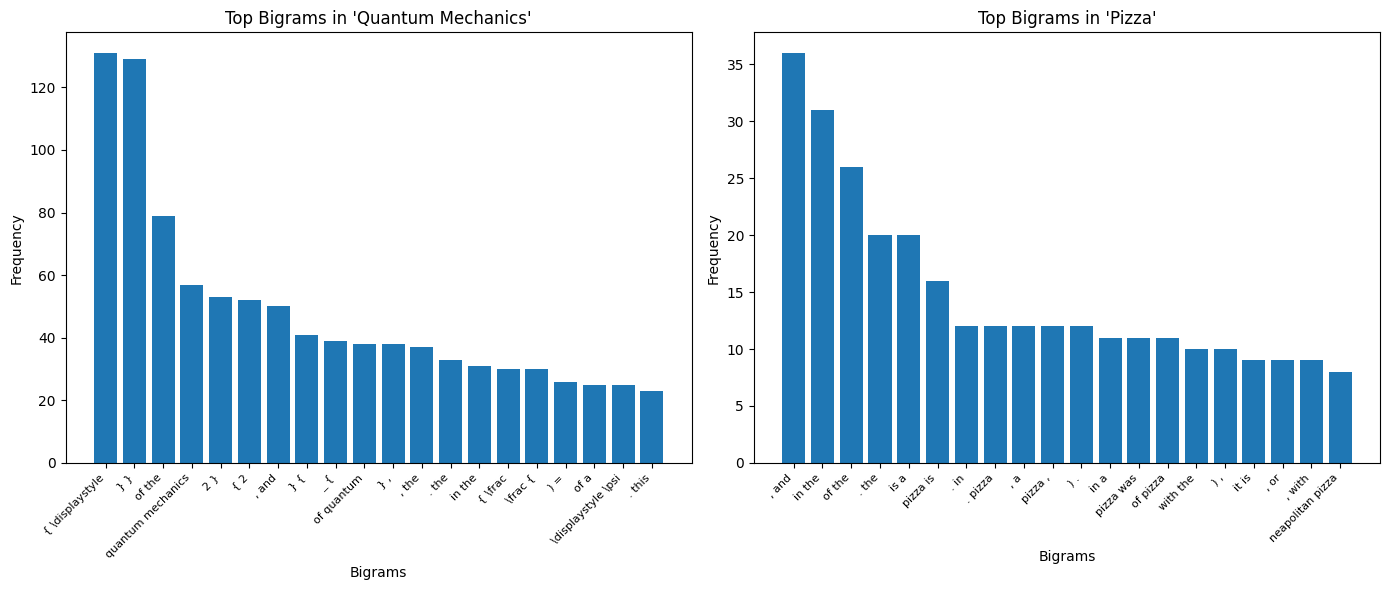

In [ ]:
# Compare bigrams of two very different Wikipedia topics
import wikipedia
from collections import Counter
from nltk import ngrams, word_tokenize
import matplotlib.pyplot as plt

# Step 1: Choose two very different topics
topic1 = "Quantum Mechanics"   # Scientific domain
topic2 = "Pizza"               # Food / Culture domain

# Step 2: Function to safely fetch Wikipedia content
def get_wikipedia_content(topic, lang='en'):
    """Fetch Wikipedia page content with basic error handling."""
    wikipedia.set_lang(lang)
    try:
        page = wikipedia.page(topic, auto_suggest=False)
        return page.content
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation for '{topic}': using '{e.options[0]}'")
        return wikipedia.page(e.options[0]).content
    except wikipedia.exceptions.PageError:
        print(f"Page not found for '{topic}', trying auto-suggest...")
        return wikipedia.page(topic).content

# Step 3: Fetch text content for both topics
text1 = get_wikipedia_content(topic1)
text2 = get_wikipedia_content(topic2)

print(f"✓ Fetched text for '{topic1}' ({len(text1)} characters)")
print(f"✓ Fetched text for '{topic2}' ({len(text2)} characters)\n")

# Step 4: Tokenize text
tokens1 = word_tokenize(text1.lower())
tokens2 = word_tokenize(text2.lower())

# Step 5: Create bigrams
bigrams1 = Counter(ngrams(tokens1, 2))
bigrams2 = Counter(ngrams(tokens2, 2))

# Step 6: Define function to plot top N bigrams
def plot_bigrams(counter_obj, title, n=20):
    items = counter_obj.most_common(n)
    bigrams = [' '.join(k) for k, _ in items]
    freqs = [v for _, v in items]
    plt.bar(bigrams, freqs)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.title(title)
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')

# Step 7: Visualize both topics side-by-side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_bigrams(bigrams1, f"Top Bigrams in '{topic1}'", n=20)

plt.subplot(1, 2, 2)
plot_bigrams(bigrams2, f"Top Bigrams in '{topic2}'", n=20)

plt.tight_layout()
plt.show()


What if we use text from another source than Wikipedia

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Error fetching article from https://www.nationalgeographic.com/science/article/climate-change-report-ipcc-un-extreme-weather:
Article `download()` failed with 404 Client Error: Not Found for url: https://www.nationalgeographic.com/science/article/climate-change-report-ipcc-un-extreme-weather on URL https://www.nationalgeographic.com/science/article/climate-change-report-ipcc-un-extreme-weather


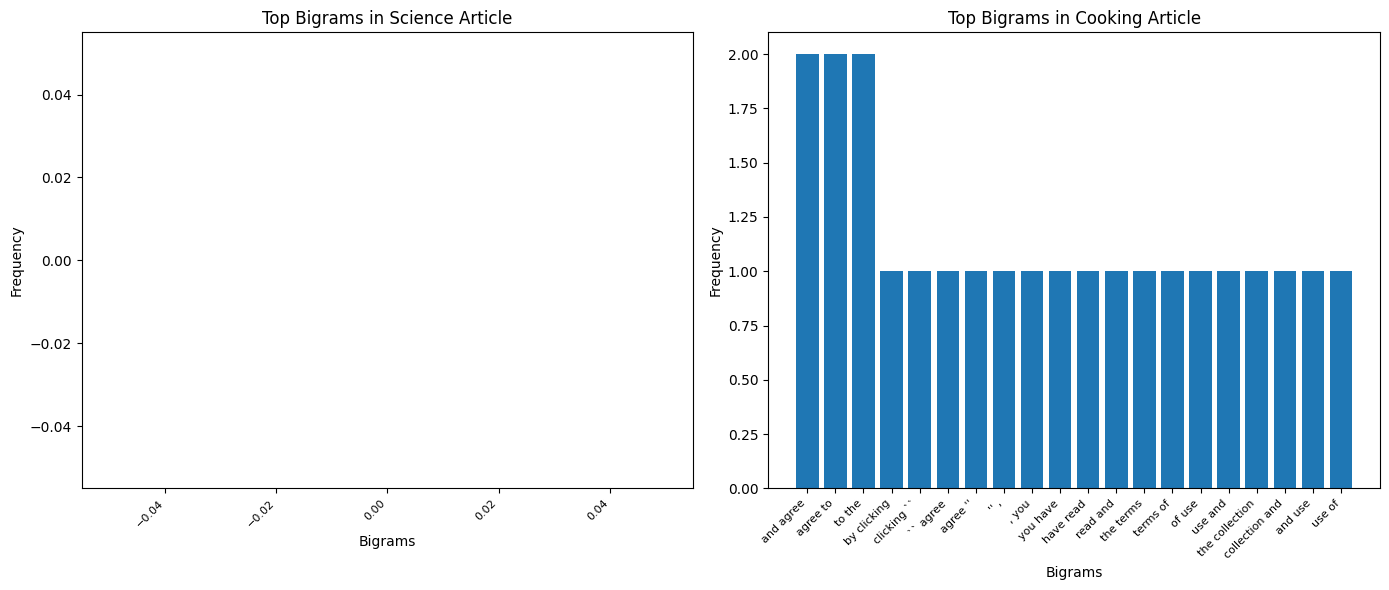

In [ ]:
# Compare bigrams from two non-Wikipedia online articles

from newspaper import Article
from collections import Counter
from nltk import ngrams, word_tokenize
import matplotlib.pyplot as plt
import nltk

# Download NLTK tokenizer model
nltk.download('punkt')
nltk.download('punkt_tab')  # In case your NLTK version needs this

# Step 1: Choose any two article URLs
url1 = "https://www.nationalgeographic.com/science/article/climate-change-report-ipcc-un-extreme-weather"  # Science article
url2 = "https://www.foodnetwork.com/recipes/pizza-recipe"  # Cooking article

# Step 2: Function to extract article text
def get_article_text(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print(f"Error fetching article from {url}:\n{e}")
        return ""

# Step 3: Get article text
text1 = get_article_text(url1)
text2 = get_article_text(url2)

# Step 4: Tokenize and compute bigrams
tokens1 = word_tokenize(text1.lower())
tokens2 = word_tokenize(text2.lower())

bigrams1 = Counter(ngrams(tokens1, 2))
bigrams2 = Counter(ngrams(tokens2, 2))

# Step 5: Define function to plot top N bigrams
def plot_bigrams(counter_obj, title, n=20):
    items = counter_obj.most_common(n)
    bigrams = [' '.join(k) for k, _ in items]
    freqs = [v for _, v in items]
    plt.bar(bigrams, freqs)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.title(title)
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')

# Step 6: Plot side-by-side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_bigrams(bigrams1, "Top Bigrams in Science Article", n=20)

plt.subplot(1, 2, 2)
plot_bigrams(bigrams2, "Top Bigrams in Cooking Article", n=20)

plt.tight_layout()
plt.show()


How can we use and visualize trigrams and higher n-grams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


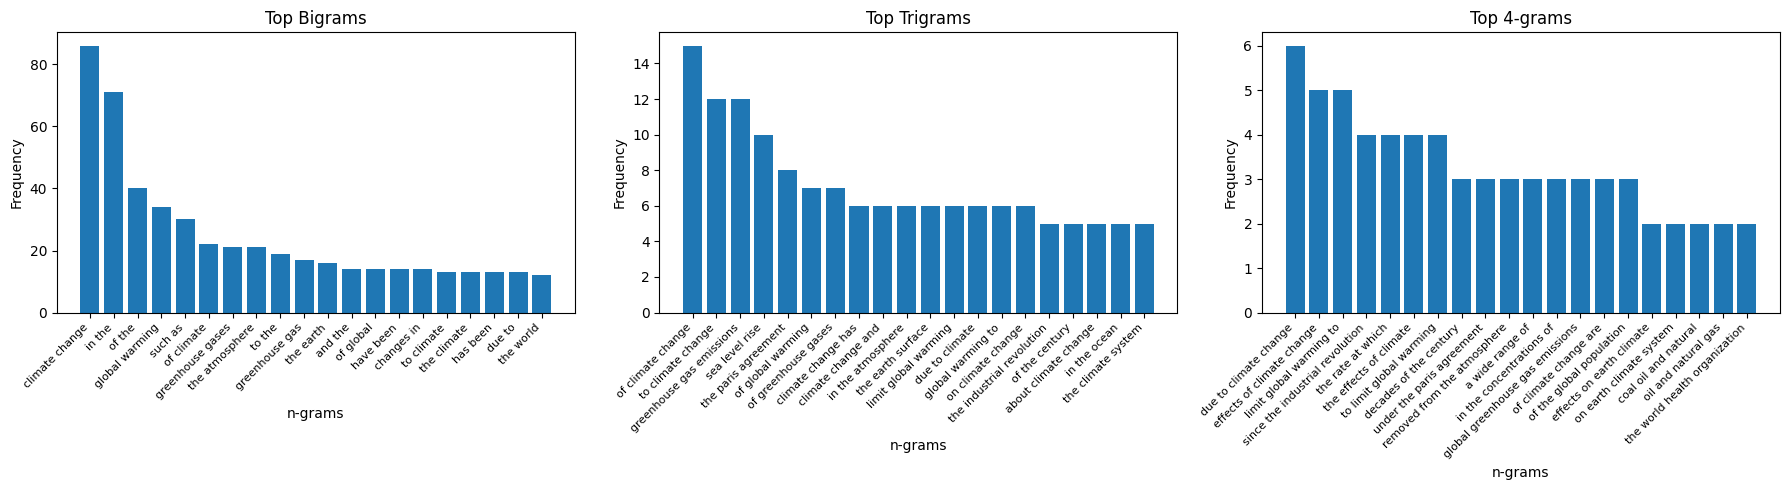

In [ ]:
# Complete code: Wikipedia n-gram analysis (2, 3, 4-word sequences)
import wikipedia
from nltk import word_tokenize, ngrams
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Download required NLTK data
nltk.download('punkt')

# Step 1: Fetch Wikipedia text
topic = "Climate change"

def get_wikipedia_content(topic, lang='en'):
    wikipedia.set_lang(lang)
    try:
        page = wikipedia.page(topic, auto_suggest=False)
        return page.content
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation for '{topic}': using '{e.options[0]}'")
        return wikipedia.page(e.options[0]).content
    except wikipedia.exceptions.PageError:
        print(f"Page not found for '{topic}', trying auto-suggest...")
        return wikipedia.page(topic).content

text = get_wikipedia_content(topic)

# Step 2: Tokenize and clean text
tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if t.isalpha()]  # Keep only alphabetic words

# Step 3: Generate n-grams and count frequency
def get_ngrams(tokens, n):
    return Counter(ngrams(tokens, n))

bigrams = get_ngrams(tokens, 2)
trigrams = get_ngrams(tokens, 3)
fourgrams = get_ngrams(tokens, 4)

# Step 4: Function to plot n-grams
def plot_ngrams(counter_obj, title, n=20):
    items = counter_obj.most_common(n)
    ngrams_list = [' '.join(k) for k, _ in items]
    freqs = [v for _, v in items]

    plt.bar(ngrams_list, freqs)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.title(title)
    plt.xlabel('n-grams')
    plt.ylabel('Frequency')

# Step 5: Plot bigrams, trigrams, and 4-grams side by side
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plot_ngrams(bigrams, "Top Bigrams", n=20)

plt.subplot(1, 3, 2)
plot_ngrams(trigrams, "Top Trigrams", n=20)

plt.subplot(1, 3, 3)
plot_ngrams(fourgrams, "Top 4-grams", n=20)

plt.tight_layout()
plt.show()


In [ ]:
! pip install lxml[html_clean]

In [ ]:
! pip install newspaper3k

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 58.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 8.1 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=55d6fdb65e3bcc27b30248df66e1ff8e188eed655fe955cf614342e652704bb1
  Stored in directory: /root/.cache/pip/wheels/a5/91/9f/00d66475960891a64867914273fcaf78df6cb04d905b104a2a
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3341 sha256=b59e8108fadc87f4ce4c9e51edd8c0ef4e2ef7ac1d488157f3845ac6abd19a37
  Stored in directory: /root/.cache/pip/wheels/9f/9f/fb/364871d7426d3cdd4d293dcf7e53d97f16

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

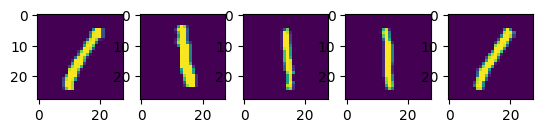

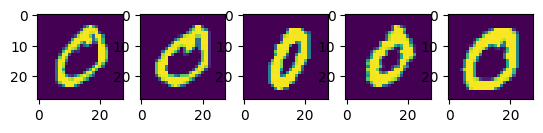

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

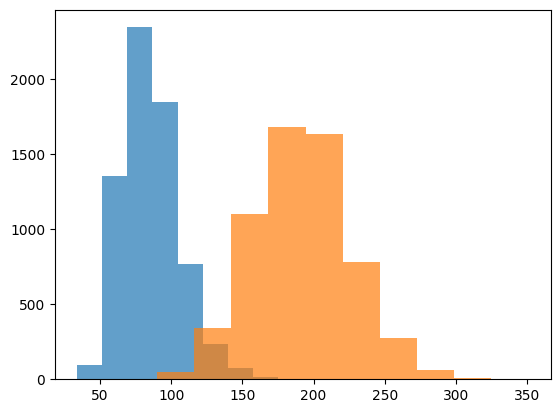

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

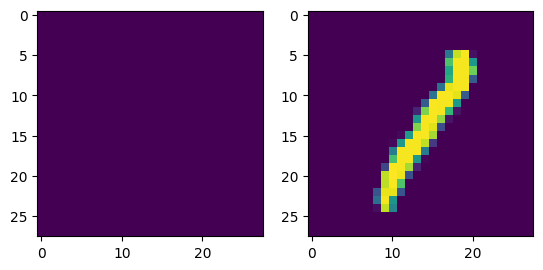

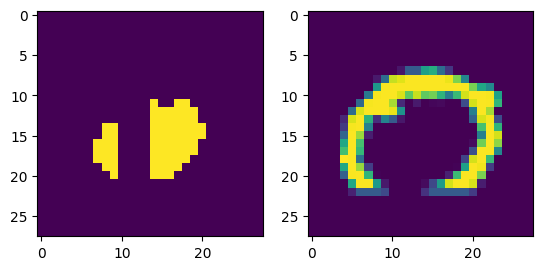

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

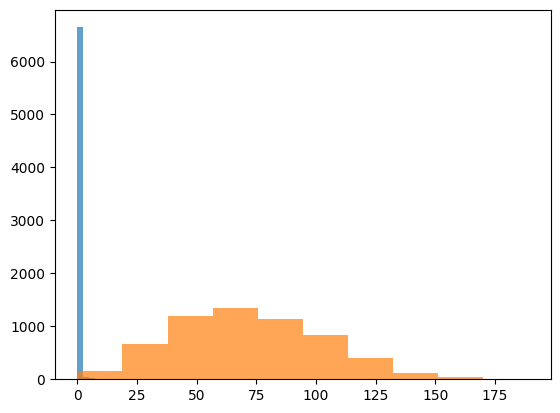

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

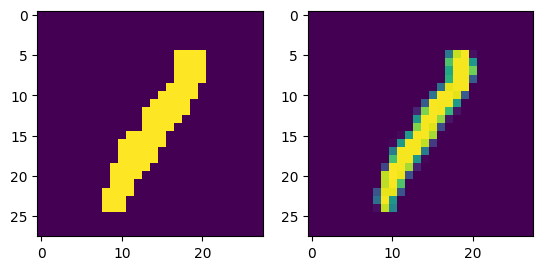

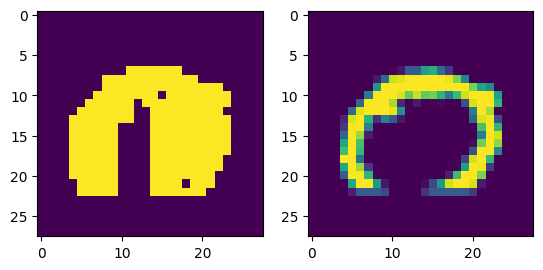

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

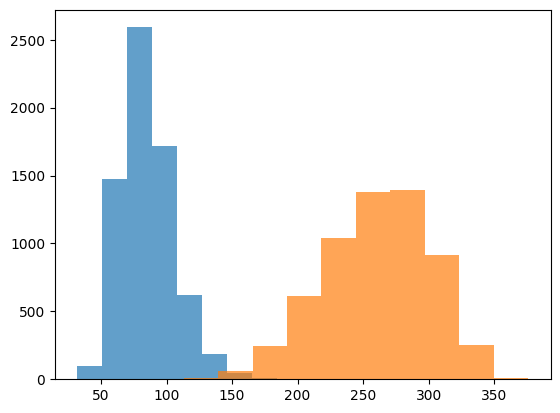

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

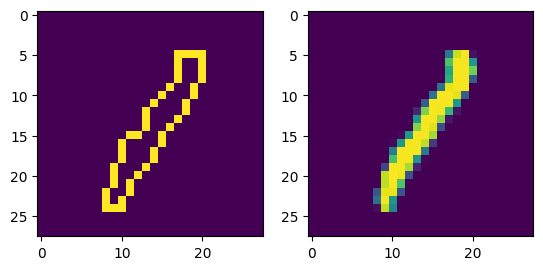

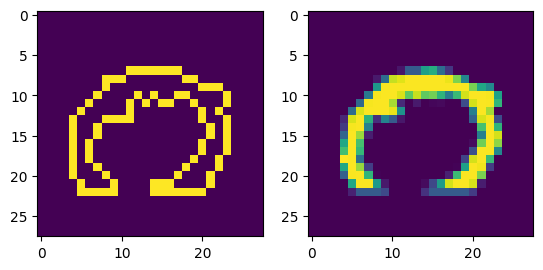

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

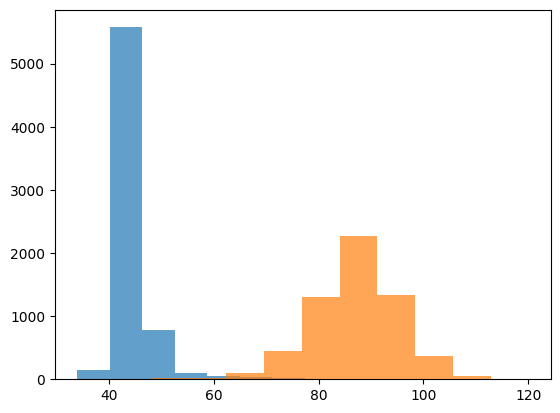

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

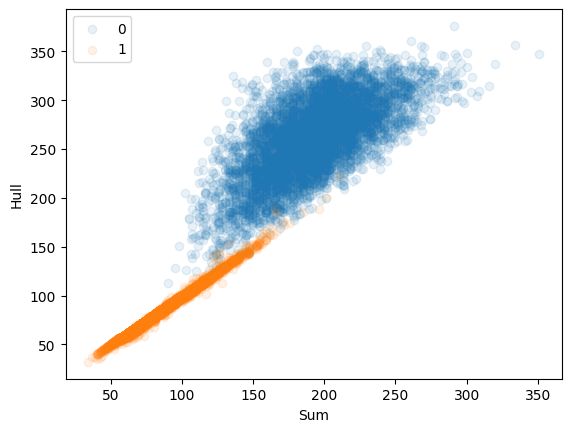

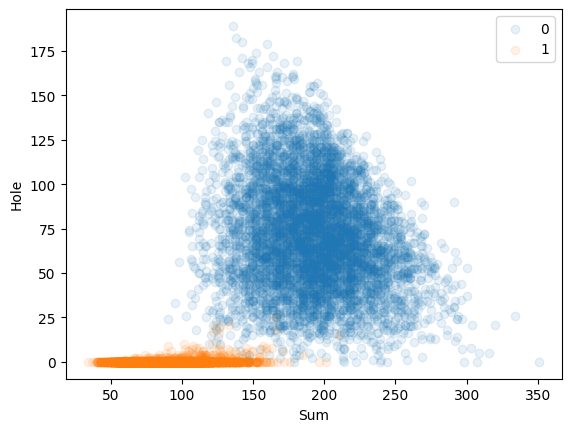

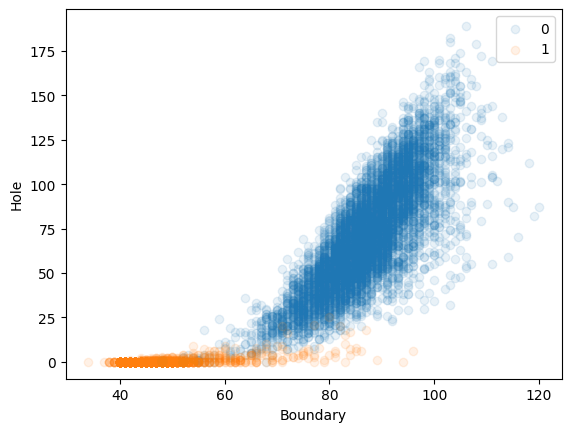

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?